## Lab08_KNN_01

### Disciplina Inteligência Artificial

### Prof: José Humberto Cruvinel

### Nome dos alunos:

* Sérgio Wilson Rosa Brito
* Charles Rodrigues Magalhães
* Julio Luiz dos Reis Filho

Neste jupyter vamos criar um modelo KNN (K vizinhos mais próximos) para classificar espécies de flores Iris.

Dataset: https://archive.ics.uci.edu/ml/datasets/iris

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/)

In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## Carregando o dataset

In [2]:
# Importando o dataset iris
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# Vendo o shape
print('Data:',iris.data.shape)
print('Target:',iris.target.shape)

Data: (150, 4)
Target: (150,)


Veja que são 150 exemplos, 4 variáveis preditoras e 1 variável Alvo (Target)

In [4]:
# Nome das colunas preditoras
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# classes alvo (TARGET)
iris.target_names.tolist()

['setosa', 'versicolor', 'virginica']

In [6]:
# Mostrando as primeiras 5 linhas do dataset
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# Podemos também trabalhar com o Pandas
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Adicionando as colunas Target e Target_Name
df['target'] = iris.target
df['target_name'] = df.apply(lambda row: iris.target_names[int(row.target)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# Vamos verificar se existem valores nulos
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [10]:
# Imprimindo o describe()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Explorando o Dataset

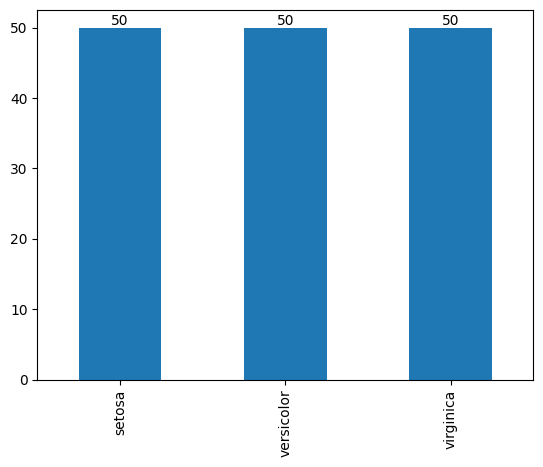

In [11]:
# Quantidade por classe TARGET
ax = df['target_name'].value_counts().sort_values().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

Veja que temos exatamente 50 exemplos para cada espécie, indicando que as classes estão balanceadas

<ipython-input-12-ee31063524e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), robust=True, fmt=".2f", cmap='YlGnBu',annot=True, linewidths=0.01, linecolor='black')


<Axes: >

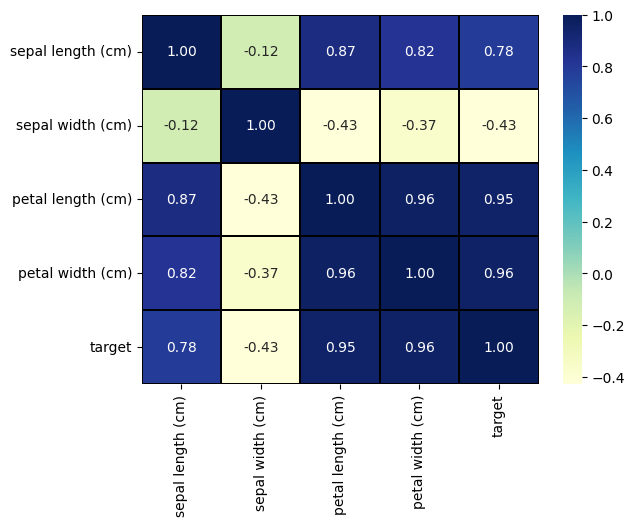

In [12]:
# Plotando a correlação de outra forma, com um mapa de calor
sns.heatmap(df.corr(), robust=True, fmt=".2f", cmap='YlGnBu',annot=True, linewidths=0.01, linecolor='black')

Podemos ver que as correlações mais fortes com o target são das variáveis  'petal_length' x 'petal_width'

In [13]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.drop(['target','target_name'], axis=1)
y = df['target_name'].values

In [14]:
# Imprimindo os primeiros valores de X
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa']


In [16]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## KNN (K – Nearest Neighbours)

In [17]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


In [18]:
# Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# prevendo valores para X_test
y_pred = knn.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (30,)


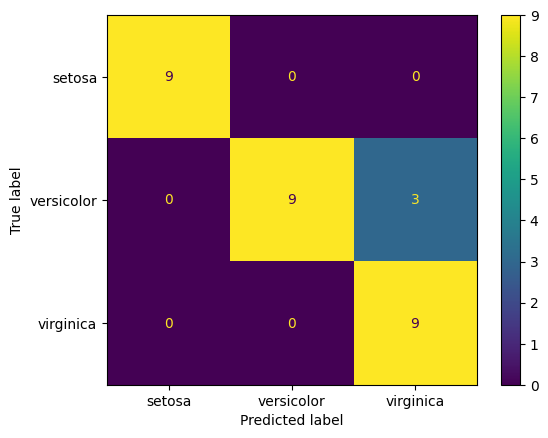

In [20]:
# Imprimindo a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [21]:
# Calculando as métricas
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print("Accuracy:    ",(tp+tn)/(tp+tn+fp+fn))
print("Precision:   ",tp/(tp+fp))
print("Recall:      ",tp/(tp+fn))
print("Specificity: ",tn/(tn+fn))
print("Sensitivity: ",tp/(tp+fn))

Accuracy:     [ 1.000  0.900  0.900]
Precision:    [ 1.000  1.000  0.750]
Recall:       [ 1.000  0.750  1.000]
Specificity:  [ 1.000  0.857  1.000]
Sensitivity:  [ 1.000  0.750  1.000]


In [22]:
# Medidas de desempenho
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred,average='weighted'))
print("Recall:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred,average='weighted'))
print("ROC AUC:",roc_auc_score(y_test,knn.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.75      0.86        12
   virginica       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

Accuracy: 0.9
Precision: 0.925
Recall: 0.9
F1 Score: 0.9
ROC AUC: 0.9983465608465608


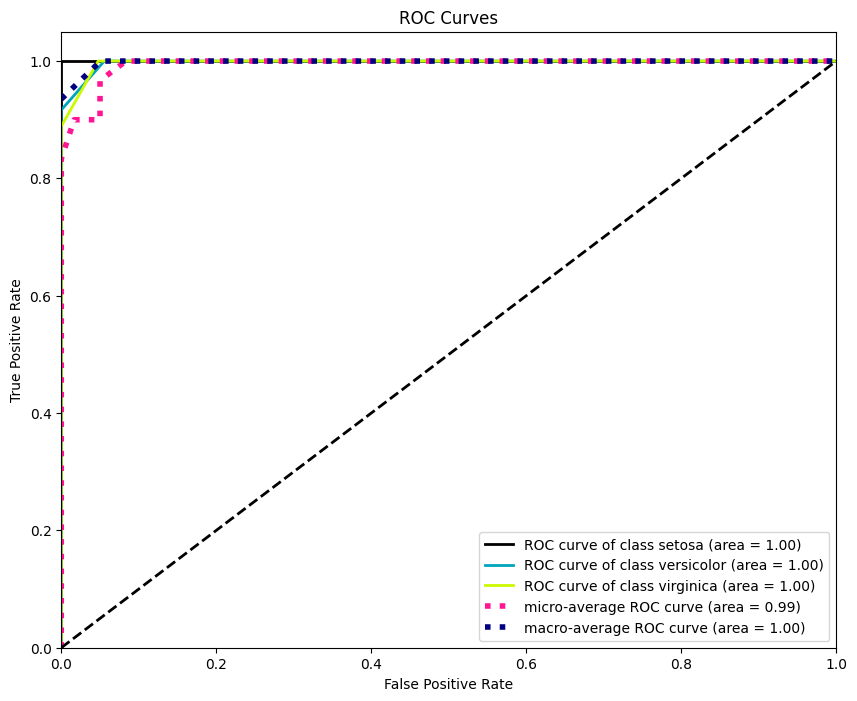

In [23]:
!pip install scikit-plot
# Plotando a curva ROC para os dados de teste
from scikitplot.metrics import plot_roc
y_probas = knn.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(10, 8))
plt.show()

In [24]:
# Fazendo uma previsão de valores fictícios (2cm x 2cm sepal - 4cm x 2cm petal)
ex1 = [2, 2, 4, 2]
output = knn.predict([ex1,])
print ('Espécie prevista:', output)
print ('Probabilidades:')
print ('  Espécies:', iris.target_names)
print ('  Probab. :', knn.predict_proba([ex1, ]))

Espécie prevista: ['versicolor']
Probabilidades:
  Espécies: ['setosa' 'versicolor' 'virginica']
  Probab. : [[ 0.000  0.800  0.200]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [25]:
# Finalmente, vamos executar o mesmo processo com vários valores de K para ver se conseguimos aumentar a precisão
results_x = []
results_y = []
for K in range(5):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    print ("Accuracy is ", accuracy,"% for K-Value:",K_value)
    results_x.append(K_value)
    results_y.append(accuracy)

Accuracy is  96.66666666666667 % for K-Value: 1
Accuracy is  96.66666666666667 % for K-Value: 2
Accuracy is  96.66666666666667 % for K-Value: 3
Accuracy is  96.66666666666667 % for K-Value: 4
Accuracy is  90.0 % for K-Value: 5


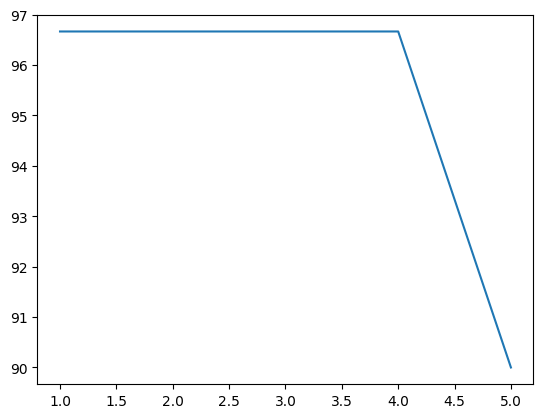

In [26]:
# Finalmente, vamos plotar o resultado da acurácia versos o valor de K
plt.plot(results_x,results_y)

# Exercício 8.1 - Otimizando o modelo KNN

Consulte a documentação do KNN em http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html e altere alguns hiper-parâmetros do modelo para ver se consegue aumentar o desempenho.

Salve os resultados (Acurácia apenas) em uma tabela, contendo os valores utilizados.

Execute novamente para mais valores de K e plote o resultado, adicionando no gráfico o título e legendas dos eixos.

Responda a pergunta: Qual a melhor acurácia foi possível obter? Qual o valor de K foi utilizado?



In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [28]:
models = [
['uniform','auto'],
['uniform','ball_tree'],
['uniform','kd_tree'],
['uniform','brute'],
['distance','auto'],
['distance','ball_tree'],
['distance','kd_tree'],
['distance','brute']
]

In [29]:
def TrainModel(model, kMax):
  bestVersionOfCurrModel = [0,0,"",""]
  for k in range(kMax):
      K_value = k+1
      neigh = KNeighborsClassifier(n_neighbors = K_value, weights=model[0], algorithm=model[1])
      neigh.fit(X_train, y_train)
      y_pred = neigh.predict(X_test)
      accuracy = accuracy_score(y_test,y_pred)*100
      if accuracy > bestVersionOfCurrModel[0]:
        bestVersionOfCurrModel = [accuracy,K_value,model[0],model[1]]
  return bestVersionOfCurrModel

In [30]:
bestModels = []
for model in models:
    modelResult = TrainModel(model, 10)
    bestModels.append(modelResult)
print(bestModels)

[[96.66666666666667, 1, 'uniform', 'auto'], [96.66666666666667, 1, 'uniform', 'ball_tree'], [96.66666666666667, 1, 'uniform', 'kd_tree'], [96.66666666666667, 1, 'uniform', 'brute'], [96.66666666666667, 1, 'distance', 'auto'], [96.66666666666667, 1, 'distance', 'ball_tree'], [96.66666666666667, 1, 'distance', 'kd_tree'], [96.66666666666667, 1, 'distance', 'brute']]


In [31]:
bestModel = [0,0,"",""]
for model in bestModels:
    if model[0] > bestModel[0]:
      bestModel = model

print(bestModel)

[96.66666666666667, 1, 'uniform', 'auto']


In [35]:
results_x = []
results_y = []
for K in range(10):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights=bestModel[2], algorithm=bestModel[3])
    neigh = Pipeline([('scale', MinMaxScaler()), ('knn', neigh)])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    print ("Accuracy is ", accuracy,"% for K-Value:",K_value)
    results_x.append(K_value)
    results_y.append(accuracy)

Accuracy is  96.66666666666667 % for K-Value: 1
Accuracy is  100.0 % for K-Value: 2
Accuracy is  93.33333333333333 % for K-Value: 3
Accuracy is  100.0 % for K-Value: 4
Accuracy is  93.33333333333333 % for K-Value: 5
Accuracy is  96.66666666666667 % for K-Value: 6
Accuracy is  93.33333333333333 % for K-Value: 7
Accuracy is  93.33333333333333 % for K-Value: 8
Accuracy is  93.33333333333333 % for K-Value: 9
Accuracy is  96.66666666666667 % for K-Value: 10


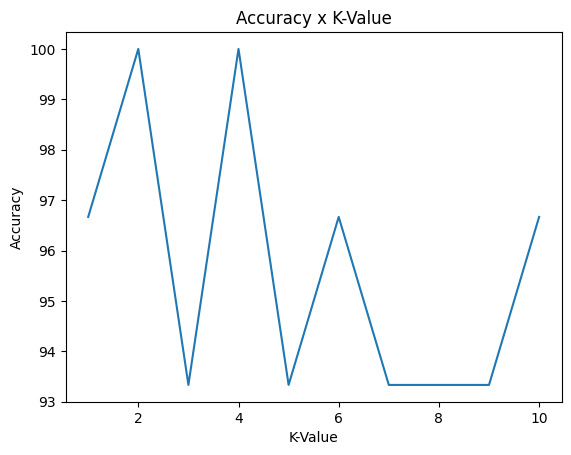

In [33]:
plt.plot(results_x, results_y)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.title("Accuracy x K-Value")
plt.show()

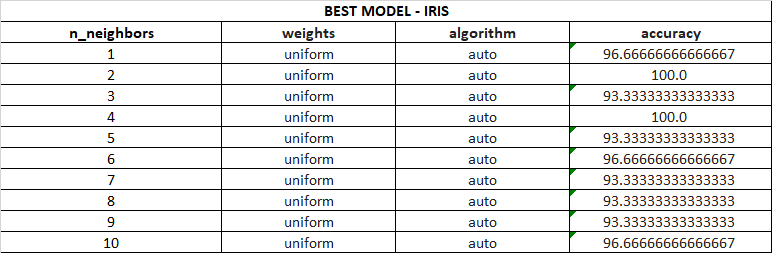